### Data Augmentation
The notebook tries different augmentation techniques on a test image of ultrasound data. The augmentation techniques used are: \
-sub image (center_crop)\
-Mirroring (hflip, vflip)\
-Noise\
-Brightness (adjust_brightness, adjust_contrast)

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import shutil
import random
from IPython.display import display
import torchvision.transforms as T


import torch
SEED = 117
torch.manual_seed(SEED)

In [3]:
def plot(imgs, with_orig=True, col_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if col_title is not None:
        for col_idx in range(num_cols-1):
            axs[0, col_idx+1].set(title=col_title[col_idx])
            axs[0, col_idx+1].title.set_size(8)

    plt.tight_layout()

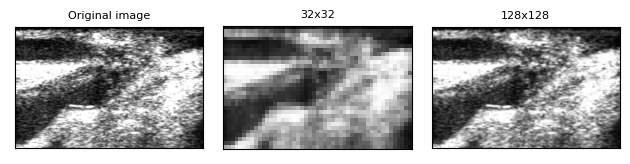

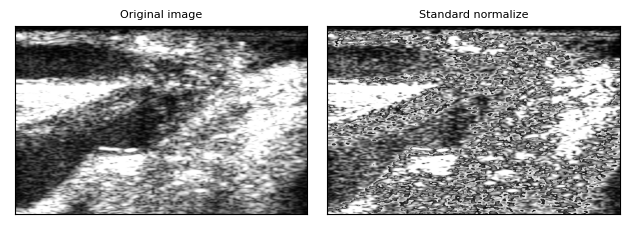

In [4]:
#Importing a random image to test data augmentation
orig_img = Image.open('/Volumes/T7/ProcessedRequestData/ProcessedData/Patient91/Case1/MeasurementSet28/bc261510-2d6d-44fc-9e60-4d7f5eca51e2_43.png')
#display(orig_img)
np.asarray(orig_img).shape #(546 x 849 x 3)

resized_imgs = [T.Resize(size=size)(orig_img) for size in [32,128]]
plot(resized_imgs,col_title=["32x32","128x128"])

#Normalizing the image
normalized_img = T.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))(T.ToTensor()(orig_img)) 
normalized_img = [T.ToPILImage()(normalized_img)]
plot(normalized_img, col_title=["Standard normalize"])


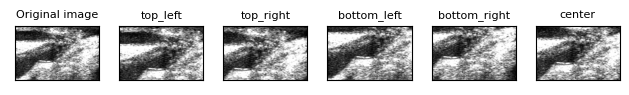

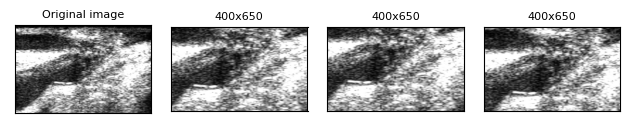

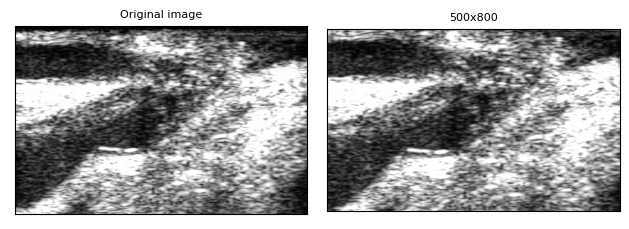

In [5]:
#Five crop
(top_left, top_right, bottom_left, bottom_right, center) = T.functional.five_crop(orig_img, size=(450, 700))
plot([top_left, top_right, bottom_left, bottom_right, center], col_title=["top_left", "top_right", "bottom_left", "bottom_right", "center"])

#Random Crop
cropper = T.RandomCrop(size=(400, 650))
crops = [cropper(orig_img) for _ in range(3)]
plot(crops, col_title=["400x650", "400x650", "400x650"])

#Center Crop
center_crops = [T.CenterCrop(size=size)(orig_img) for size in [(500,800)]]
plot(center_crops,col_title=['500x800'])


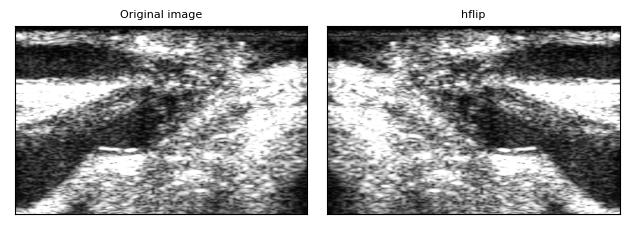

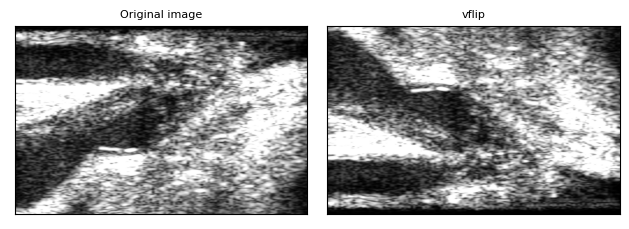

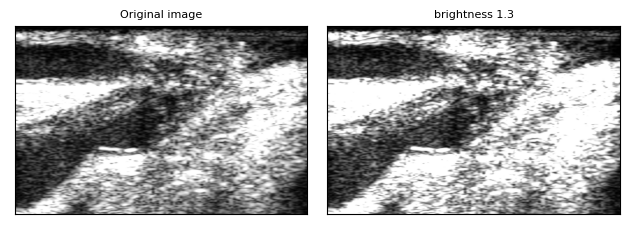

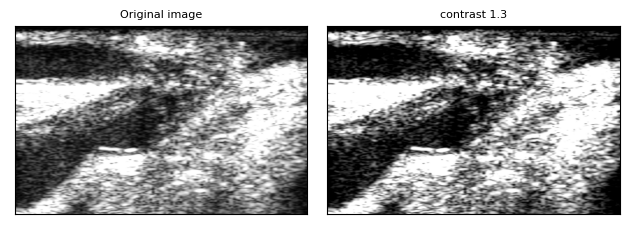

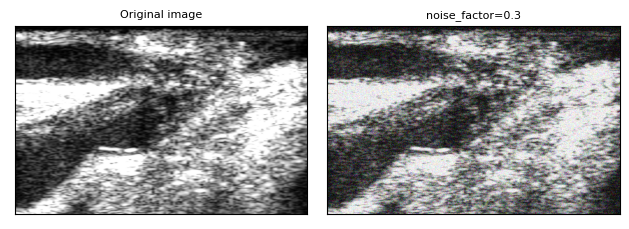

In [12]:
#hflip, vflip
hflip = [T.functional.hflip(orig_img)]
plot(hflip,col_title=['hflip'])

vflip = [T.functional.vflip(orig_img)]
plot(vflip,col_title=['vflip'])

#Brightness
#brightness = [T.functional.adjust_brightness(orig_img, brightness_factor=bright) for bright in (0.75, 1.3, 2.0)]
brightness = [T.functional.adjust_brightness(orig_img, brightness_factor=1.3) ]
plot(brightness,col_title=['brightness 1.3'])

#Contrast
#contrast = [T.functional.adjust_contrast(orig_img, contrast_factor=con) for con in (0.75, 1.3, 2.0)]
contrast = [T.functional.adjust_contrast(orig_img, contrast_factor=1.3)]
plot(contrast,col_title=['contrast 1.3'])

#Gaussian noise
def add_noise(inputs,noise_factor=0.3):
     noisy = inputs+torch.randn_like(inputs) * noise_factor
     noisy = torch.clip(noisy,0.,1.)
     return noisy
    
#noise_imgs = [add_noise(T.ToTensor()(orig_img),noise_factor) for noise_factor in (0.3,0.6,0.9)]
noise_imgs = [add_noise(T.ToTensor()(orig_img),0.2)]
noise_imgs = [T.ToPILImage()(noise_img) for noise_img in noise_imgs]
plot(noise_imgs, col_title=["noise_factor=0.3"])
    